**Problem Statement**

Predict house prices in Hyderabad using property features such as area, location, BHK, rate per sqft, and building status.

**1️⃣ Understand the Problem & Dataset**

In [29]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [30]:
df=pd.read_csv('/content/Hyderbad_House_price.csv')

In [ ]:
df.head()

,Unnamed: 0,title,location,price(L),rate_persqft,area_insqft,building_status
0,0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction


In [31]:
df.shape

(3660, 7)

In [32]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3660 non-null   int64  
 1   title            3660 non-null   object 
 2   location         3660 non-null   object 
 3   price(L)         3660 non-null   float64
 4   rate_persqft     3660 non-null   int64  
 5   area_insqft      3660 non-null   int64  
 6   building_status  3660 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 200.3+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3660.0,1829.500000,1056.695320,0.00,914.7500,1829.50,2744.25,3659.0
price(L),3660.0,109.624350,197.596948,1.32,26.1375,61.13,116.00,3600.0
rate_persqft,3660.0,5165.003005,5316.490320,125.00,1555.0000,4703.00,6800.00,112474.0
area_insqft,3660.0,2023.506284,1829.832163,118.00,1280.0000,1620.00,2080.00,45000.0


In [36]:
df.corr

<bound method DataFrame.corr of       Unnamed: 0                    title            location  price(L)  \
0              0          3 BHK Apartment            Nizampet    108.00   
1              1          3 BHK Apartment          Bachupally     85.80   
2              2          2 BHK Apartment            Dundigal     55.64   
3              3          2 BHK Apartment            Pocharam     60.48   
4              4          3 BHK Apartment              Kollur    113.00   
...          ...                      ...                 ...       ...   
3655        3655          2 BHK Apartment            Ameerpet     60.00   
3656        3656  2 BHK Independent House       Jawahar nagar     65.00   
3657        3657  2 BHK Independent Floor          Rasoolpura     65.00   
3658        3658  2 BHK Independent Floor  Begum Bazar Chatri     55.00   
3659        3659  2 BHK Independent House        Rajeev Nagar     67.00   

      rate_persqft  area_insqft     building_status  
0             6000         1805  Under Construction  
1             5500         1560  Under Construction  
2             5200         1070  Under Construction  
3             4999         1210  Under Construction  
4             5999         1900  Under Construction  
...            ...          ...                 ...  
3655          6000         1000       Ready to move  
3656          3250         2000       Ready to move  
3657          6500         1000       Ready to move  
3658          5500         1000       Ready to move  
3659          4962         1350       Ready to move  

[3660 rows x 7 columns]>

In [37]:
df.columns

Index(['Unnamed: 0', 'title', 'location', 'price(L)', 'rate_persqft',
       'area_insqft', 'building_status'],
      dtype='object')

In [38]:
df

,Unnamed: 0,title,location,price(L),rate_persqft,area_insqft,building_status
0,0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction
...,...,...,...,...,...,...,...
3655,3655,2 BHK Apartment,Ameerpet,60.00,6000,1000,Ready to move
3656,3656,2 BHK Independent House,Jawahar nagar,65.00,3250,2000,Ready to move
3657,3657,2 BHK Independent Floor,Rasoolpura,65.00,6500,1000,Ready to move
3658,3658,2 BHK Independent Floor,Begum Bazar Chatri,55.00,5500,1000,Ready to move


**2️⃣ Data Cleaning**

**`1.Remove unnecessary columns`**

In [39]:
df.drop(columns=['Unnamed: 0'], inplace=True)


**2.Check missing values**

In [40]:
df.isnull().sum()


,0
title,0
location,0
price(L),0
rate_persqft,0
area_insqft,0
building_status,0


**3️⃣ Exploratory Data Analysis (EDA)**

**To check skewness, outliers, and price range**

In [41]:
df['price(L)'].describe()


,price(L)
count,3660.000000
mean,109.624350
std,197.596948
min,1.320000
25%,26.137500
50%,61.130000
75%,116.000000
max,3600.000000


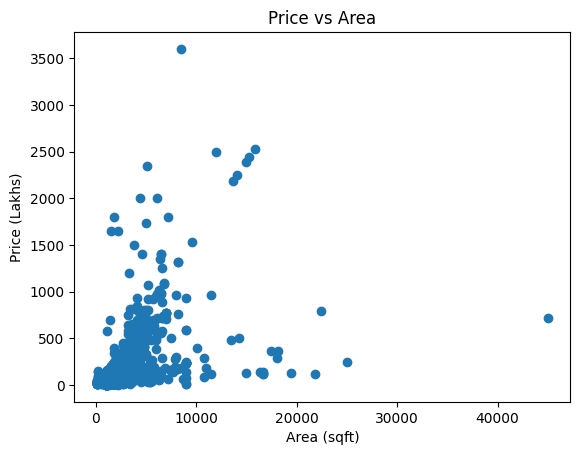

In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['area_insqft'], df['price(L)'])
plt.xlabel("Area (sqft)")
plt.ylabel("Price (Lakhs)")
plt.title("Price vs Area")
plt.show()

**Insight: Moderate positive relationship → bigger houses generally cost more.**

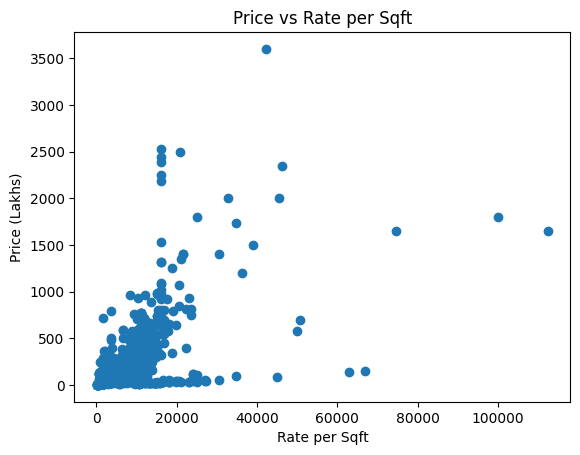

In [45]:
plt.figure()
plt.scatter(df['rate_persqft'], df['price(L)'])
plt.xlabel("Rate per Sqft")
plt.ylabel("Price (Lakhs)")
plt.title("Price vs Rate per Sqft")
plt.show()


**Insight: Strong positive relationship → rate per sqft is a key price driver.**

In [42]:
df[['price(L)', 'area_insqft', 'rate_persqft']].corr()


,price(L),area_insqft,rate_persqft
price(L),1.000000,0.516428,0.628859
area_insqft,0.516428,1.000000,0.050840
rate_persqft,0.628859,0.050840,1.000000


<Figure size 640x480 with 0 Axes>

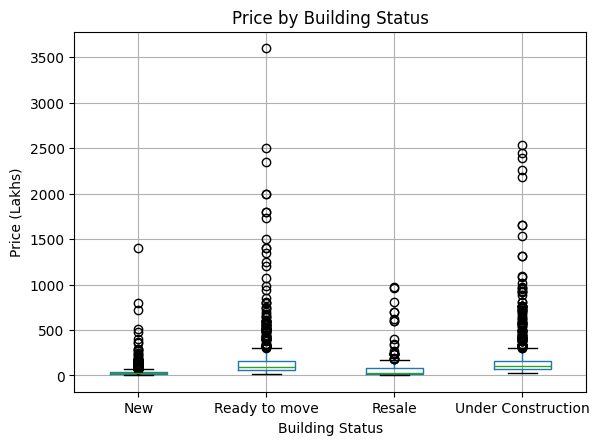

In [46]:
plt.figure()
df.boxplot(column='price(L)', by='building_status')
plt.xlabel("Building Status")
plt.ylabel("Price (Lakhs)")
plt.title("Price by Building Status")
plt.suptitle("")
plt.show()


**Insight: Ready-to-move houses are priced higher than under-construction ones.**

<Figure size 640x480 with 0 Axes>

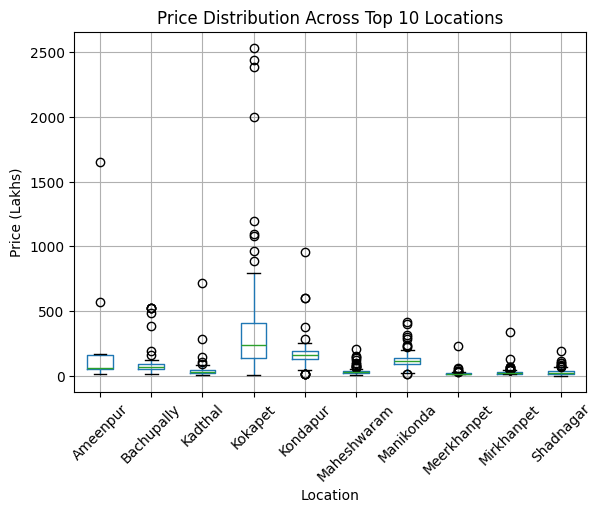

In [47]:
top_locations = df['location'].value_counts().head(10).index
df_top = df[df['location'].isin(top_locations)]

plt.figure()
df_top.boxplot(column='price(L)', by='location', rot=45)
plt.xlabel("Location")
plt.ylabel("Price (Lakhs)")
plt.title("Price Distribution Across Top 10 Locations")
plt.suptitle("")
plt.show()


**Insight: Location causes significant price variation.**

**4️⃣ Outlier Detection & Handling**

Outliers are extreme values that can distort model learning, especially in regression.
If not handled:
---MAE increases
---Model becomes biased    toward  high prices

In [48]:
num_cols = ['price(L)', 'area_insqft', 'rate_persqft']


**Visualize Outliers using Boxplots**

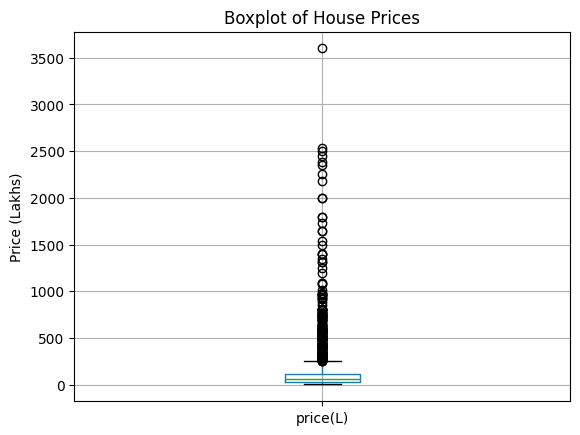

In [49]:


plt.figure()
df.boxplot(column='price(L)')
plt.title("Boxplot of House Prices")
plt.ylabel("Price (Lakhs)")
plt.show()


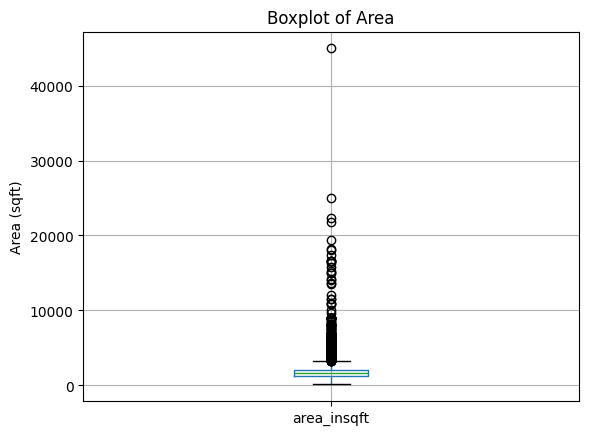

In [50]:
plt.figure()
df.boxplot(column='area_insqft')
plt.title("Boxplot of Area")
plt.ylabel("Area (sqft)")
plt.show()


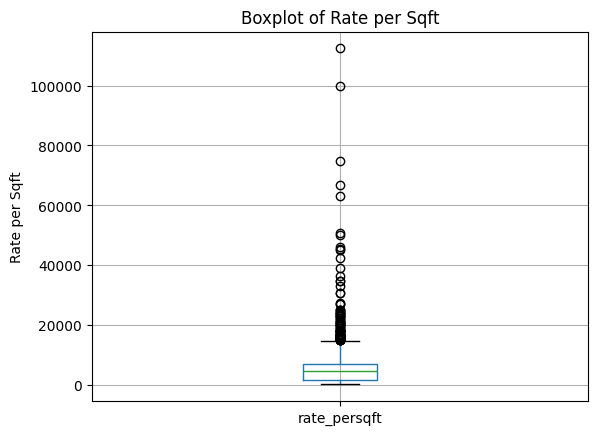

In [51]:
plt.figure()
df.boxplot(column='rate_persqft')
plt.title("Boxplot of Rate per Sqft")
plt.ylabel("Rate per Sqft")
plt.show()


🏠 Should We Remove All Outliers in House Price Data?
❌ Removing all outliers is NOT recommended
✅ Selective & domain-aware handling is the correct approach **bold text**

✔ Keeps luxury houses
✔ Reduces extreme influence

In [52]:
df['price(L)'] = df['price(L)'].clip(
    lower=df['price(L)'].quantile(0.01),
    upper=df['price(L)'].quantile(0.99)
)


Remove outliers only from training set and Log-transform the target variable

In [53]:
import numpy as np
y = np.log1p(df['price(L)'])


In [58]:
df.shape

(3660, 6)

Alternative Approach (Capping Instead of Removing) which is suitable because our dataset is small

In [55]:
upper_limit = df['price(L)'].quantile(0.99)
df['price(L)'] = df['price(L)'].clip(upper=upper_limit)


In [57]:
df

,title,location,price(L),rate_persqft,area_insqft,building_status
0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction
...,...,...,...,...,...,...
3655,2 BHK Apartment,Ameerpet,60.00,6000,1000,Ready to move
3656,2 BHK Independent House,Jawahar nagar,65.00,3250,2000,Ready to move
3657,2 BHK Independent Floor,Rasoolpura,65.00,6500,1000,Ready to move
3658,2 BHK Independent Floor,Begum Bazar Chatri,55.00,5500,1000,Ready to move


**5: Feature Engineering**:

Raw features don’t always capture real-world meaning.
Feature engineering helps the model learn better patterns.

Extract BHK from title:
title is text → ML can’t understand it directly

BHK (2, 3, 4) is a strong numerical indicator of price

In [60]:
df['bhk'] = df['title'].str.extract('(\d+)').fillna(0).astype(int)
df.drop(columns=['title'], inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1022685555.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['bhk'] = df['title'].str.extract('(\d+)').fillna(0).astype(int)


In [61]:
df['derived_rate'] = (df['price(L)'] * 100000) / df['area_insqft']


In [62]:
df

,location,price(L),rate_persqft,area_insqft,building_status,bhk,derived_rate
0,Nizampet,108.00,6000,1805,Under Construction,3,5983.379501
1,Bachupally,85.80,5500,1560,Under Construction,3,5500.000000
2,Dundigal,55.64,5200,1070,Under Construction,2,5200.000000
3,Pocharam,60.48,4999,1210,Under Construction,2,4998.347107
4,Kollur,113.00,5999,1900,Under Construction,3,5947.368421
...,...,...,...,...,...,...,...
3655,Ameerpet,60.00,6000,1000,Ready to move,2,6000.000000
3656,Jawahar nagar,65.00,3250,2000,Ready to move,2,3250.000000
3657,Rasoolpura,65.00,6500,1000,Ready to move,2,6500.000000
3658,Begum Bazar Chatri,55.00,5500,1000,Ready to move,2,5500.000000


In [63]:
df.drop(columns=['derived_rate'], inplace=True)


In [64]:
df

,location,price(L),rate_persqft,area_insqft,building_status,bhk
0,Nizampet,108.00,6000,1805,Under Construction,3
1,Bachupally,85.80,5500,1560,Under Construction,3
2,Dundigal,55.64,5200,1070,Under Construction,2
3,Pocharam,60.48,4999,1210,Under Construction,2
4,Kollur,113.00,5999,1900,Under Construction,3
...,...,...,...,...,...,...
3655,Ameerpet,60.00,6000,1000,Ready to move,2
3656,Jawahar nagar,65.00,3250,2000,Ready to move,2
3657,Rasoolpura,65.00,6500,1000,Ready to move,2
3658,Begum Bazar Chatri,55.00,5500,1000,Ready to move,2


**6: Scaling & Encoding**
Why Scaling?

Prevents numerical dominance

Needed for distance-based & linear models

Safe practice inside pipelines

Why Encoding?

ML models don’t understand text

OneHotEncoder avoids false ordering

✔ handle_unknown='ignore' prevents test errors

In [66]:
X = df.drop('price(L)', axis=1)
y = df['price(L)']
num_cols = ['area_insqft', 'rate_persqft', 'bhk']
cat_cols = ['location', 'building_status']



In [67]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


**7: Model Training**

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Why Gradient Boosting?

 Handles non-linearity,
 Robust to feature interactions,and
 Works well with mixed features


Model Pipeline

In [69]:

from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline([
    ('preprocess', preprocess),
    ('gbr', GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

Train the Model

In [70]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area_insqft',
                                                   'rate_persqft', 'bhk']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location',
                                                   'building_status'])])),
                ('gbr',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=300,
                                           random_state=42))])

**Evaluation & Insights**

Predictions

In [72]:
y_pred = model.predict(X_test)


Evaluation Metrics

In [73]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R² Score:", r2_score(y_test, y_pred))
print("MAE (Lakhs):", mean_absolute_error(y_test, y_pred))


R² Score: 0.9782330225280856
MAE (Lakhs): 7.3583784017949805
